In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.api.types import CategoricalDtype
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from sklearn import model_selection, ensemble, metrics, linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
import os
base_dir = '../data'
print(os.listdir(base_dir))


# Any results you write to the current directory are saved as output.https://www.kaggle.com/wanermiranda/linear-regression-ml-tp1?scriptVersionId=5240484

['test.pkl', 'diamonds.csv', 'train.pkl']


/root/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df_diamonds = pd.read_csv('%s/diamonds.csv'%(base_dir), index_col='Unnamed: 0')
df_diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## Numeric Features 
* Carat: weight of the diamond
* depth: depth %  The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
* table: table % The width of the diamond's table expressed as a percentage of its average diameter
* price: the price of the diamond
* xlength: mm
* ywidth: mm
* zdepth: mm

In [3]:
df_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## cut 
Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal

In [4]:
cuts_ordered = ['Fair',
                'Good',
                'Very Good',
                'Premium',
                'Ideal']
df_diamonds['cut'] = df_diamonds['cut'].astype(CategoricalDtype(cuts_ordered, ordered=True))
print(df_diamonds['cut'].unique())
df_diamonds['cut'].describe()

[Ideal, Premium, Good, Very Good, Fair]
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]


count     53940
unique        5
top       Ideal
freq      21551
Name: cut, dtype: object

## color
mColor of the diamond, with D being the best and J the worst

In [5]:
colors_ordered = [  'J',
                    'I',
                    'H',
                    'G',
                    'F',
                    'E',
                    'D']
df_diamonds['color'] = df_diamonds['color'].astype(CategoricalDtype(colors_ordered, ordered=True))
print(df_diamonds['color'].unique())
df_diamonds['color'].describe()

[E, I, J, H, F, G, D]
Categories (7, object): [J < I < H < G < F < E < D]


count     53940
unique        7
top           G
freq      11292
Name: color, dtype: object

## clarity
How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

In [6]:
clarity_codes = {'I3',
'I2',
'I1',
'SI2',
'SI1',
'VS2',
'VS1',
'VVS2',
'VVS1',
'IF',
'FL'}
df_diamonds['clarity'] = df_diamonds['clarity'].astype(CategoricalDtype(clarity_codes, ordered=True))
print(df_diamonds['clarity'].unique())
df_diamonds['clarity'].describe()

[SI2, SI1, VS1, VS2, VVS2, VVS1, I1, IF]
Categories (8, object): [SI2 < SI1 < VS2 < IF < VVS1 < VS1 < I1 < VVS2]


count     53940
unique        8
top         SI1
freq      13065
Name: clarity, dtype: object

## Cleaning the Data
There are some zero dimensions for the diamonds, since that must be noise or mistype, we are cleaning it.


In [7]:
df_diamonds = df_diamonds.drop(df_diamonds.loc[df_diamonds.x <= 0].index)
df_diamonds = df_diamonds.drop(df_diamonds.loc[df_diamonds.y <= 0].index)
df_diamonds = df_diamonds.drop(df_diamonds.loc[df_diamonds.z <= 0].index)
df_diamonds = df_diamonds.drop(df_diamonds.loc[df_diamonds.carat <= 0].index)
df_diamonds = df_diamonds.drop(df_diamonds.loc[df_diamonds.depth <= 0].index)
df_diamonds = df_diamonds.drop(df_diamonds.loc[df_diamonds.table <= 0].index)

## Handcraft features
Since the measures for the diamond follow a 3d shape, we are considering here some handcraft features. 
Volume for the diamond = reflecting its size and weight. 
Ratio between the X, Y and Z.


In [8]:
df_diamonds['volume'] = df_diamonds['x'] * df_diamonds['y'] * df_diamonds['z']
df_diamonds['ratio_xy'] = df_diamonds['x'] / df_diamonds['y']
# df_diamonds['ratio_xz'] = df_diamonds['x'] / df_diamonds['z']
df_diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,ratio_xy
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,0.992462
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,1.013021
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,0.995086
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,0.992908
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,0.997701
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,38.693952,0.994949
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,38.830870,0.992462
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,42.321081,0.990268
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,36.425214,1.023810
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,38.718000,0.987654


In [9]:
train, test_reserved = model_selection.train_test_split(df_diamonds, test_size=0.2, random_state=42)
test_reserved.to_csv('test.csv')
train.to_csv('train.csv')

df_diamonds = train

# Distribution Overview
The prices seems to follow a power law curve, as show bellow in the graph. 

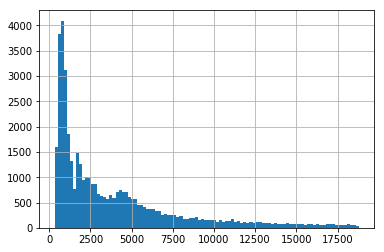

In [10]:
df_diamonds['price'].hist(bins=100)

In [11]:
df_diamonds['price'].describe()

count    43136.000000
mean      3926.531459
std       3983.079043
min        326.000000
25%        950.750000
50%       2398.000000
75%       5330.000000
max      18806.000000
Name: price, dtype: float64

## SGD Regression For Fun


In [12]:
cat_columns = df_diamonds.select_dtypes(['category']).columns.values
df_diamonds[cat_columns] = df_diamonds[cat_columns].apply(lambda x: x.cat.codes)



## Normalizing the Data
Using the robust scaller **to not only use the mean normalization**, but also to be less vulnerable to outliers.

In [13]:
X  = df_diamonds.copy()
y = X.pop('price')


## Regression
Since there is no negative values in the prices we are using here the log(price) to maintain this domain during the regression train. 
We are also using a 5 cross fold validation to do the grid search. 

A validation set was extracted from the data as a simulation for the test set.


In [14]:
from sklearn.model_selection import *

X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.1, random_state=42)
scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [15]:

    
def sklLinearRegressionModel(X_train,y_train,best_hyperparams):
	regression = linear_model.SGDRegressor(**best_hyperparams, penalty=None, verbose=True) 
	regression.fit(X_train, np.log(y_train))
	return regression


def crossValidationKFold(X_train,y_train):
	hyperparams = {
    	'learning_rate':['invscaling', 'optimal'],
    	'eta0': [0.1, 0.05, 0.01], 
    	'max_iter':[20000, 10000]
	}

	scoring = {
    	'NEG_MSE': 'neg_mean_squared_error',
    	'NEG_MAE': 'neg_mean_absolute_error',
    	'VARIANCE': 'r2'
	}

	regr = GridSearchCV(linear_model.SGDRegressor(), hyperparams, cv=5, scoring=scoring, refit='VARIANCE', n_jobs=-1, verbose=True)

	regr.fit(X_train, np.log(y_train))

	return regr.best_params_


best_hyperparams = {'learning_rate': 'invscaling', 'max_iter': 2000, 'eta0': 0.01}
regr = sklLinearRegressionModel(X_train,y_train,best_hyperparams)

-- Epoch 1
Norm: 0.98, NNZs: 11, Bias: 7.657853, T: 38822, Avg. loss: 0.182553
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1.21, NNZs: 11, Bias: 7.724249, T: 77644, Avg. loss: 0.027089
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 1.39, NNZs: 11, Bias: 7.759975, T: 116466, Avg. loss: 0.022152
Total training time: 0.05 seconds.
-- Epoch 4
Norm: 1.48, NNZs: 11, Bias: 7.770402, T: 155288, Avg. loss: 0.020564
Total training time: 0.06 seconds.
-- Epoch 5
Norm: 1.54, NNZs: 11, Bias: 7.779908, T: 194110, Avg. loss: 0.019974
Total training time: 0.07 seconds.
-- Epoch 6
Norm: 1.58, NNZs: 11, Bias: 7.795566, T: 232932, Avg. loss: 0.019719
Total training time: 0.08 seconds.
-- Epoch 7
Norm: 1.60, NNZs: 11, Bias: 7.801189, T: 271754, Avg. loss: 0.019553
Total training time: 0.09 seconds.
-- Epoch 8
Norm: 1.62, NNZs: 11, Bias: 7.804956, T: 310576, Avg. loss: 0.019487
Total training time: 0.10 seconds.
-- Epoch 9
Norm: 1.64, NNZs: 11, Bias: 7.802267, T: 349398, Avg. loss: 0.019441
To

Norm: 1.72, NNZs: 11, Bias: 7.805847, T: 3183404, Avg. loss: 0.019291
Total training time: 0.83 seconds.
-- Epoch 83
Norm: 1.72, NNZs: 11, Bias: 7.810822, T: 3222226, Avg. loss: 0.019278
Total training time: 0.84 seconds.
-- Epoch 84
Norm: 1.72, NNZs: 11, Bias: 7.806530, T: 3261048, Avg. loss: 0.019283
Total training time: 0.85 seconds.
-- Epoch 85
Norm: 1.72, NNZs: 11, Bias: 7.806713, T: 3299870, Avg. loss: 0.019286
Total training time: 0.86 seconds.
-- Epoch 86
Norm: 1.72, NNZs: 11, Bias: 7.805692, T: 3338692, Avg. loss: 0.019285
Total training time: 0.87 seconds.
-- Epoch 87
Norm: 1.72, NNZs: 11, Bias: 7.803601, T: 3377514, Avg. loss: 0.019283
Total training time: 0.88 seconds.
-- Epoch 88
Norm: 1.72, NNZs: 11, Bias: 7.808111, T: 3416336, Avg. loss: 0.019280
Total training time: 0.89 seconds.
-- Epoch 89
Norm: 1.73, NNZs: 11, Bias: 7.804490, T: 3455158, Avg. loss: 0.019276
Total training time: 0.90 seconds.
-- Epoch 90
Norm: 1.73, NNZs: 11, Bias: 7.805408, T: 3493980, Avg. loss: 0.0

Norm: 1.78, NNZs: 11, Bias: 7.804121, T: 6289164, Avg. loss: 0.019222
Total training time: 1.66 seconds.
-- Epoch 163
Norm: 1.78, NNZs: 11, Bias: 7.807617, T: 6327986, Avg. loss: 0.019225
Total training time: 1.67 seconds.
-- Epoch 164
Norm: 1.78, NNZs: 11, Bias: 7.808078, T: 6366808, Avg. loss: 0.019225
Total training time: 1.68 seconds.
-- Epoch 165
Norm: 1.78, NNZs: 11, Bias: 7.804983, T: 6405630, Avg. loss: 0.019219
Total training time: 1.69 seconds.
-- Epoch 166
Norm: 1.78, NNZs: 11, Bias: 7.804059, T: 6444452, Avg. loss: 0.019220
Total training time: 1.70 seconds.
-- Epoch 167
Norm: 1.78, NNZs: 11, Bias: 7.806920, T: 6483274, Avg. loss: 0.019217
Total training time: 1.71 seconds.
-- Epoch 168
Norm: 1.78, NNZs: 11, Bias: 7.807377, T: 6522096, Avg. loss: 0.019216
Total training time: 1.72 seconds.
-- Epoch 169
Norm: 1.78, NNZs: 11, Bias: 7.806060, T: 6560918, Avg. loss: 0.019215
Total training time: 1.73 seconds.
-- Epoch 170
Norm: 1.78, NNZs: 11, Bias: 7.803843, T: 6599740, Avg. l

KeyboardInterrupt: 

In [ ]:
scoring = {
    	'NEG_MSE': 'neg_mean_squared_error',
    	'NEG_MAE': 'neg_mean_absolute_error',
    	'VARIANCE': 'r2'
	}

for k, score in scoring.items(): 
    regr.verbose = False
    scores = model_selection.cross_val_score(regr, X_train, y_train, cv=5, scoring=score, n_jobs=-1, verbose=True)
    print (k,  np.mean(scores), np.std(scores))
        

In [ ]:
# regr.best_params_

In [ ]:
y_val.describe()

In [ ]:
y_pred = np.exp(regr.predict(X_val))
pd.Series(y_pred).describe()

In [ ]:
print("MSE: %.3f" % metrics.mean_squared_error(y_val, y_pred))
print("MAE: %.3f" % metrics.mean_absolute_error(y_val, y_pred))
print('R2: %.3f' % metrics.r2_score(y_val, y_pred))

plt.hist(y_val, bins=100, color='blue', linewidth=3)
plt.show()
plt.hist(y_pred, bins=100, color='red', linewidth=3)
plt.show()

In [ ]:
df = pd.DataFrame({'real': y_val, 'pred': y_pred})
ax = df.sort_values('real').plot.scatter('real', 'pred', figsize=(5, 5))
_ = ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)

In [ ]:
def oneHotEncoding(features,columnName):
	currentCol = features.columns.get_loc(columnName)
	uniqueFeatures = features[columnName].unique()
	print(uniqueFeatures)
	for f in range(len(uniqueFeatures)):
		features.insert(loc=currentCol+f,column=columnName+str(f),value=0)
		features[columnName+str(f)][features[columnName]==uniqueFeatures[f]] = 1
		
	features.pop(columnName)

def dummieCoding(features,columnName,orderedFeature):
	c = 0
	for f in range(len(orderedFeature)):
		features[columnName][features[columnName]==orderedFeature[f]] = 2**c
		c = c + 1

In [ ]:
def RMSE(theta,X,y):
	y_linha = hypothesis(theta,X)
	error = math.sqrt(((y_linha-y)**2).mean())
	return error

#
#  For linear regression, it is possible to estimate the values
# of all parameters theta by applying the normal equation method,
# which corresponds to the following equation:
#
#  Theta = (Xt.X)^-1.Xt.y
#
#  This procedure is called Normal Equation, which is implemented
# here
#
# params:
#   X -> set of features
#   Y -> set of targets
#
# return:
#   theta -> set of parameters
#
def normalEquation(X,y):
	X = np.insert(X,0,1,axis=1)
	npX = np.copy(X)
	npY = y.transpose()
	npXt = npX.transpose()

	R1 = np.matmul(npXt,npX)

	det = np.linalg.det(R1)

	if (det != 0):
		R1 = np.linalg.inv(R1)
		R2 = np.matmul(npXt,npY)
		theta = np.matmul(R1,R2)
	else:
		theta = []
		print("Error! Matrix (Xt.X) has no inverse.")

	error = RMSE(theta,X,y)
	print("Normal Equation --- RMSE error: ",str(error))

	X = np.delete(X,0,axis=1)

	return theta

In [ ]:
theta = np.array([1, 0, 1], dtype=np.double)
theta_temp = np.array([0, 0, 0], dtype=np.double)
y = np.array([5.,10.], dtype=np.double)
X = np.array([[0.,1., 2.],[0.,2., 3.]], dtype=np.double)
print (X)
alpha = .01
max_iter = 50

In [ ]:
def hypothesis(theta, X):
    return np.sum(theta.T * X, axis=1)
    
def MSE_theta(theta, X, y, alpha,j, h0, error):                
        S = np.sum(np.matmul(error, X[:,j]))                
        result = theta[j] - (alpha * (1. / len(y)) * S)        
        return result

for i in range(max_iter):
    h0 = hypothesis(theta, X)
    error = (h0 - y)
    for j in range(X.shape[1]):
        theta_temp[j] = MSE_theta(theta, X, y, alpha, j, h0, error)    
        
    theta = theta_temp.copy()
    print (theta)    

hypothesis(theta, X)

In [ ]:
import math

import math


def SGD_(alpha, max_iter, X, y):
    
    # Creating theta0 
    X = np.insert(X, values=1, obj=0, axis=1)
    
    shape = X.shape
    nsamples = shape[0]
    print("Number of samples: "+str(nsamples))
    theta0 = np.zeros(nsamples)
    nparams = shape[1]
    print("Number of parameters: "+str(nparams))


    theta = np.random.uniform(size=nparams)
    theta_temp = np.ones(nparams)

    error = 1
    epsilon = 0.001
    it = 0
    i = 0   
    power_t = 0.25
    t=1.0
    
    while ((error > epsilon) and (it < max_iter)):
        h0 = hypothesis(theta, X)
        eta = alpha / pow(t, power_t)
        error = (h0 - y)
        for j in range(nparams):
            theta_temp[j] = MSE_theta(theta, X, y, eta, j, h0, error)                
        it += 1
        i += 1
        y_pred = hypothesis(theta_temp, X)
#         print (y,hyphotesis(theta_temp, X))
        error =  ((y - y_pred) ** 2).mean() / 2 
#         print(theta)
#         print(theta_temp)

        theta = theta_temp.copy()
        
        if (i % 100) == 0 or i == 1:
            print("Epoch: %s Batch: %s Error: %.8f lr: %.8f "%(it, i, error, eta))
        t += 1            
   
    return theta
def predict(theta, X):
    X = np.insert(X, values=1, obj=0, axis=1)
    return hypothesis(theta_h, X)

max_iter = 10000
theta_h = SGD_(alpha, max_iter, X, y)
print (y,predict(theta_h, X))


In [ ]:
max_iter = 10000
theta_h = SGD_(1., max_iter=max_iter, X=X_train, y=np.log(y_train.values))


In [ ]:
y_pred = np.exp(predict(theta_h, X_val))

df = pd.DataFrame({'real': y_val, 'pred': y_pred})
ax = df.sort_values('real').plot.scatter('real', 'pred', figsize=(5, 5))
_ = ax.plot([y_val.min(), y_val.max()], [y_pred.min(), y_pred.max()], 'k--', lw=3)



In [ ]:
np.mean((np.log(y_pred) - np.log(y_val.values))**2)

In [ ]:
np.mean((y_pred - y_val.values)**2)

In [ ]:
print("MSE: %.3f" % metrics.mean_squared_error(y_val, y_pred))
print("MAE: %.3f" % metrics.mean_absolute_error(y_val, y_pred))
print('R2: %.3f' % metrics.r2_score(y_val, y_pred))

plt.hist(y_val, bins=100, color='blue', linewidth=3)
plt.show()
plt.hist(y_pred, bins=100, color='red', linewidth=3)
plt.show()

In [ ]:
theta_h = normalEquation(X_train, y=np.log(y_train.values))
y_pred = np.exp(predict(theta_h, X_val))
print("MSE: %.3f" % metrics.mean_squared_error(y_val, y_pred))
print("MAE: %.3f" % metrics.mean_absolute_error(y_val, y_pred))
print('R2: %.3f' % metrics.r2_score(y_val, y_pred))

plt.hist(y_val, bins=100, color='blue', linewidth=3)
plt.show()
plt.hist(y_pred, bins=100, color='red', linewidth=3)
plt.show()

In [ ]:
theta_h = normalEquation(X_train, y=y_train.values)
y_pred = predict(theta_h, X_val)
print("MSE: %.3f" % metrics.mean_squared_error(y_val, y_pred))
print("MAE: %.3f" % metrics.mean_absolute_error(y_val, y_pred))
print('R2: %.3f' % metrics.r2_score(y_val, y_pred))

plt.hist(y_val, bins=100, color='blue', linewidth=3)
plt.show()
plt.hist(y_pred, bins=100, color='red', linewidth=3)
plt.show()